In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import mean_squared_error
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
np.random.seed(0)
tf.random.set_seed(0)
%matplotlib inline

In [2]:
# Use the helper code below to generate the data

# Defines the number of data points to generate
num_points = 30 

# Generate predictor points (x) between 0 and 5
x = np.linspace(0,5,num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Generate data of the true function y = x*sin(x) 
# x_b will be used for all predictions below 
x_b = np.linspace(0,5,100)
y_b = x_b*np.sin(x_b)


In [3]:
# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


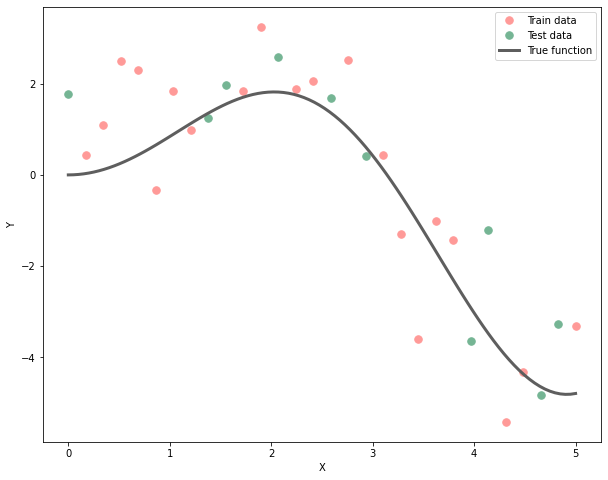

In [4]:
# Plot the train data
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plot the test data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Plot the true data
plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [13]:
x_train.shape

(20,)

In [14]:
x_test.shape

(10,)

(100,)

## Begin with an unregularized NN

In [8]:
# Building an unregularized NN. 
# Initialise the NN, give it an appropriate name for the ease of reading
# The FCNN has 5 layers, each with 100 nodes
model_1 = models.Sequential()

# Add 5 hidden layers with 100 neurons each 
# tanh is the activation for the first layer
# relu is the activation for all other layers
model_1.add(tf.keras.layers.Dense(100,input_shape=(1,),activation='tanh'))
model_1.add(layers.Dense(100,activation='ReLU'))
model_1.add(layers.Dense(100,activation='ReLU'))
model_1.add(layers.Dense(100,activation='ReLU'))
model_1.add(layers.Dense(100,activation='ReLU'))


# Add the output layer with one neuron and linear activation
model_1.add(layers.Dense(1,activation='linear'))

# View the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

In [9]:
# Compile the model with MSE as loss and Adam optimizer with learning rate as 0.001
opt = tf.keras.optimizers.Adam(lr=0.001)
model_1.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_squared_error'])

# Save the history about the model after fitting on the train data
# Use 0.2 as the validation split with 1500 epochs and batch size of 10
history_1 = model_1.fit(x_train,y_train,epochs=1500,batch_size=10,validation_split=0.2)

Epoch 1/1500
2/2 [==============================] - 1s 169ms/step - loss: 6.4331 - mean_squared_error: 6.4331 - val_loss: 3.6094 - val_mean_squared_error: 3.6094
Epoch 2/1500
2/2 [==============================] - 0s 35ms/step - loss: 6.2606 - mean_squared_error: 6.2606 - val_loss: 4.0023 - val_mean_squared_error: 4.0023
Epoch 3/1500
2/2 [==============================] - 0s 35ms/step - loss: 5.8153 - mean_squared_error: 5.8153 - val_loss: 4.2356 - val_mean_squared_error: 4.2356
Epoch 4/1500
2/2 [==============================] - 0s 29ms/step - loss: 5.6865 - mean_squared_error: 5.6865 - val_loss: 4.6315 - val_mean_squared_error: 4.6315
Epoch 5/1500
2/2 [==============================] - 0s 30ms/step - loss: 5.5609 - mean_squared_error: 5.5609 - val_loss: 5.0863 - val_mean_squared_error: 5.0863
Epoch 6/1500
2/2 [==============================] - 0s 31ms/step - loss: 5.4146 - mean_squared_error: 5.4146 - val_loss: 5.4834 - val_mean_squared_error: 5.4834
Epoch 7/1500
2/2 [===============

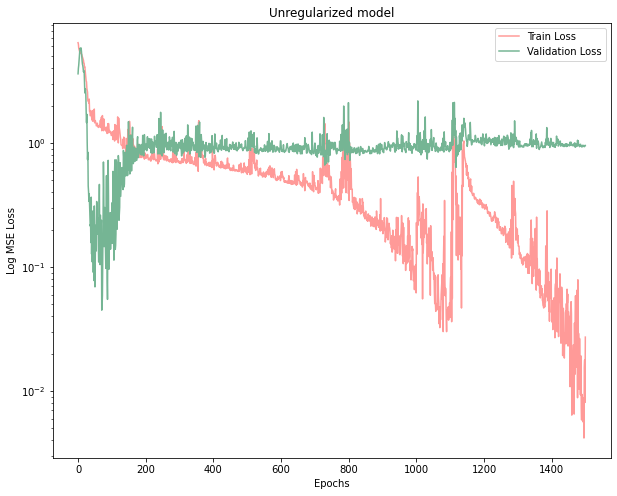

In [10]:
# Helper function to plot the data
# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Unregularized model")
plt.semilogy(history_1.history['loss'], label='Train Loss', color='#FF9A98')
plt.semilogy(history_1.history['val_loss'],  label='Validation Loss', color='#75B594')
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()
plt.show()

In [25]:
# Use the model above to predict for x_b (used exclusively for plotting)
y_pred = model_1.predict(x_b)

# Use the model above to predict for x_text  
y_pred_test = model_1.predict(x_test)

# Compute the test MSE
mse = mean_squared_error(y_test,y_pred_test)

In [21]:
y_pred = model_1.evaluate(x_b)

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - mean_squared_error: 0.0000e+00


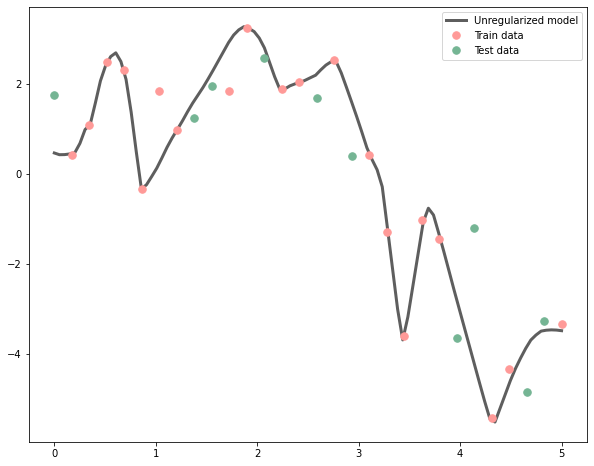

In [26]:
# Use the helper code to plot the predicted data
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#5E5E5E', linewidth=3)
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')
plt.legend()
plt.show()

## Regularize the NN with L2 regularization 
#### The previous graph indicates that there is overfitting
#### We now initialise a NN with L2 regularization 

In [34]:
# We will now regularise the NN with L2 regularization
# Initialise the NN, give it a different name for the ease of reading
model_2 = models.Sequential(name='regularized_model')

# Add L2 regularization to the model
# Use L2 regularization parameter value of 0.1 
reg = tf.keras.regularizers.L2(l2=0.1)

# Add 5 hidden layers with 100 neurons each
# relu is the activation for all other layers
# Don't forget to include the regularization parameter from above
model_2.add(layers.Dense(100,  kernel_regularizer=reg , activation='tanh', input_shape=(1,)))
model_2.add(layers.Dense(100, kernel_regularizer=reg,activation='ReLU'))
model_2.add(layers.Dense(100, kernel_regularizer=reg,activation='ReLU'))
model_2.add(layers.Dense(100, kernel_regularizer=reg,activation='ReLU'))
model_2.add(layers.Dense(100,kernel_regularizer=reg,activation='ReLU'))


# Add the output layer with one neuron and linear activation
model_2.add(layers.Dense(1))


In [35]:
# Compile the model with MSE as loss and Adam optimizer with learning rate as 0.001
opt = tf.keras.optimizers.Adam(lr=0.001)
model_2.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_squared_error'])

# Save the history about the model after fitting on the train data
# Use 0.2 as the validation split with 1500 epochs and batch size of 10
history_2 = model_2.fit(x_train,y_train,batch_size=10, epochs=1500,validation_split=0.2)

Epoch 1/1500
2/2 [==============================] - 1s 202ms/step - loss: 46.8526 - mean_squared_error: 7.0925 - val_loss: 42.0231 - val_mean_squared_error: 3.2358
Epoch 2/1500
2/2 [==============================] - 0s 27ms/step - loss: 45.3485 - mean_squared_error: 6.7738 - val_loss: 41.1141 - val_mean_squared_error: 3.4696
Epoch 3/1500
2/2 [==============================] - 0s 31ms/step - loss: 43.7770 - mean_squared_error: 6.3492 - val_loss: 40.1109 - val_mean_squared_error: 3.5987
Epoch 4/1500
2/2 [==============================] - 0s 28ms/step - loss: 42.5091 - mean_squared_error: 6.2031 - val_loss: 39.2101 - val_mean_squared_error: 3.7923
Epoch 5/1500
2/2 [==============================] - 0s 26ms/step - loss: 41.2549 - mean_squared_error: 6.0387 - val_loss: 38.3790 - val_mean_squared_error: 4.0328
Epoch 6/1500
2/2 [==============================] - 0s 29ms/step - loss: 39.9725 - mean_squared_error: 5.8250 - val_loss: 37.5906 - val_mean_squared_error: 4.2941
Epoch 7/1500
2/2 [===

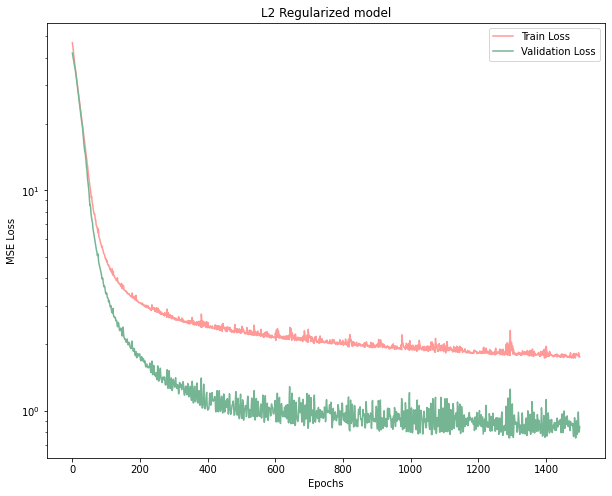

In [36]:
# Helper code to plot the MSE of the L2 regularized model

plt.rcParams["figure.figsize"] = (10,8)
plt.title("L2 Regularized model")
plt.semilogy(history_2.history['loss'], label='Train Loss', color='#FF9A98')
plt.semilogy(history_2.history['val_loss'], label='Validation Loss', color='#75B594')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [37]:
# Use the regularised model above to predict for x_b (used exclusively for plotting)
y_l2_regularized_pred = model_2.predict(x_b)

# Use the regularised model above to predict for x_text  
y_l2_pred_test = model_2.predict(x_test)

# Compute the test MSE by predicting on the test data
mse_l2 = mean_squared_error(y_test,y_l2_pred_test)

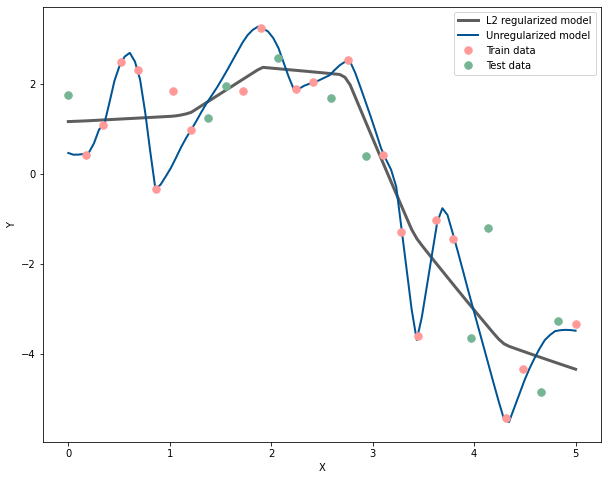

In [38]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(x_b, y_l2_regularized_pred, label='L2 regularized model', color='#5E5E5E', linewidth=3)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()